# Import & EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout

from tkinter import *
import tkinter as tk

from tkinter import ttk
import re

from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import to_categorical

In [2]:

# Driver code
if __name__ == "__main__":
    # create a GUI window
    gui = Tk()
    # set the background colour of GUI window
    gui.configure(background="light blue")
    # set the title of GUI window
    gui.title("Neural Networks gui-Great Learning")
    # set the configuration of GUI window
    gui.geometry("570x350")
    
#Declaration
Name_var = tk.StringVar()

#*****************ROW 0 STARTS*************************
#Label : File Name ROW 0 / COL 0
Name = ttk.Label(gui,text="Step 1:File Name ")
Name.grid(row=0,column=0,sticky=tk.W)

#Input Box : ROW 0 / COL 1
Name_entrybox = ttk.Entry(gui,width=16,textvariable = Name_var)
Name_entrybox.grid(row=0,column=1)


    
#This will import File to be read into the jupiter 
def Import_Data():
    global df
    DF_Name = Name_var.get()
    DB_Extension = re.findall("\..*", DF_Name)    
    df = pd.read_csv(DF_Name)
    # ROW 0 / COL 3
    confirm = "Done . Please close the window "
    Confirm_entrybox = ttk.Entry(gui,width = 16)
    Confirm_entrybox.grid(row=0,column=3)
    Confirm_entrybox.insert(1,str(confirm))
   
 #Button : ROW 0 / COL 2
Import_Data_Button = ttk.Button(gui,text="Import Data",command = Import_Data)
Import_Data_Button.grid(row=0,column=2)
        
gui.mainloop()

In [3]:
#df = pd.read_csv('Signal.csv')
df.shape

(1599, 12)

#### We have 1599 rows and 12 columns.

In [4]:
duplicate = df[df.duplicated()]
print("Duplicate Rows :",duplicate.shape[0])

Duplicate Rows : 240


- There are 240 duplicate rows, first we will get along without dropping them as we have less data to train our model.

In [5]:
df.sample(10)

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
677,8.6,0.800,0.11,2.3,0.084,12.0,31.0,0.99790,3.40,0.48,9.9,5
461,8.3,0.615,0.22,2.6,0.087,6.0,19.0,0.99820,3.26,0.61,9.3,5
125,9.0,0.620,0.04,1.9,0.146,27.0,90.0,0.99840,3.16,0.70,9.4,5
1255,6.1,0.640,0.02,2.4,0.069,26.0,46.0,0.99358,3.47,0.45,11.0,5
1459,7.9,0.200,0.35,1.7,0.054,7.0,15.0,0.99458,3.32,0.80,11.9,7
1252,7.1,0.720,0.00,1.8,0.123,6.0,14.0,0.99627,3.45,0.58,9.8,5
1064,8.2,0.740,0.09,2.0,0.067,5.0,10.0,0.99418,3.28,0.57,11.8,6
317,9.6,0.770,0.12,2.9,0.082,30.0,74.0,0.99865,3.30,0.64,10.4,6
200,9.6,0.320,0.47,1.4,0.056,9.0,24.0,0.99695,3.22,0.82,10.3,7
424,7.7,0.960,0.20,2.0,0.047,15.0,60.0,0.99550,3.36,0.44,10.9,5


In [6]:
df.isna().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

- There is no null value present in our dataset.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


- Except our Target variable which is integer datatype, all variables are float datatype.

In [8]:
df.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


- Let's check unique values in each column.

In [9]:
df.nunique()

Parameter 1         96
Parameter 2        143
Parameter 3         80
Parameter 4         91
Parameter 5        153
Parameter 6         60
Parameter 7        144
Parameter 8        436
Parameter 9         89
Parameter 10        96
Parameter 11        65
Signal_Strength      6
dtype: int64

# Plots

5    681
6    638
7    199
4     53
8     18
3     10
Name: Signal_Strength, dtype: int64


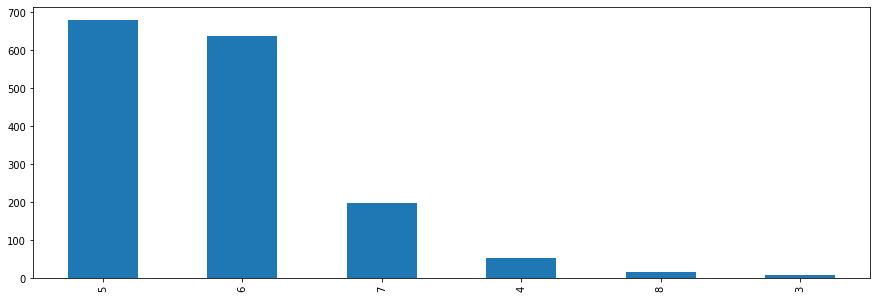

In [10]:
df['Signal_Strength'].value_counts().plot(kind = 'bar', figsize =(15,5))
print(df['Signal_Strength'].value_counts())

- Our target variable most have data resembling to 5, followed by 6,7 and so on and so forth.

<AxesSubplot:ylabel='Signal_Strength'>

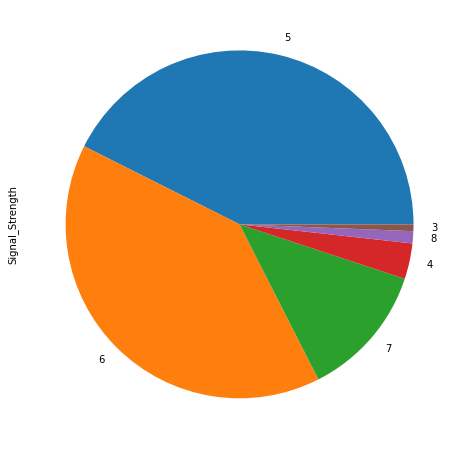

In [11]:
df['Signal_Strength'].value_counts().plot(kind = 'pie', figsize =(28,8))

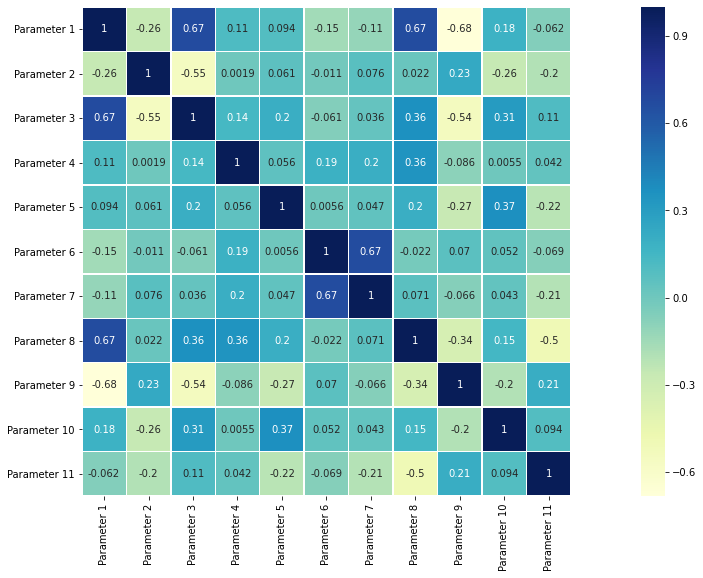

In [12]:
# df with independent variables :idf
idf = df.loc[:,df.columns != 'Signal_Strength']
import seaborn as sns
plt.figure(figsize=(25,9))
sns.heatmap(idf.corr(),annot=True,linewidths=.5,cmap="YlGnBu",square=True)
plt.show()

- Parameter 1 & 9 are highly corelated
- Parameter 3 & 8 correlations are same with parameter 1
- Parameter 6 & 7 are highly corelated
- All othere parameter are loosely co-related with each other

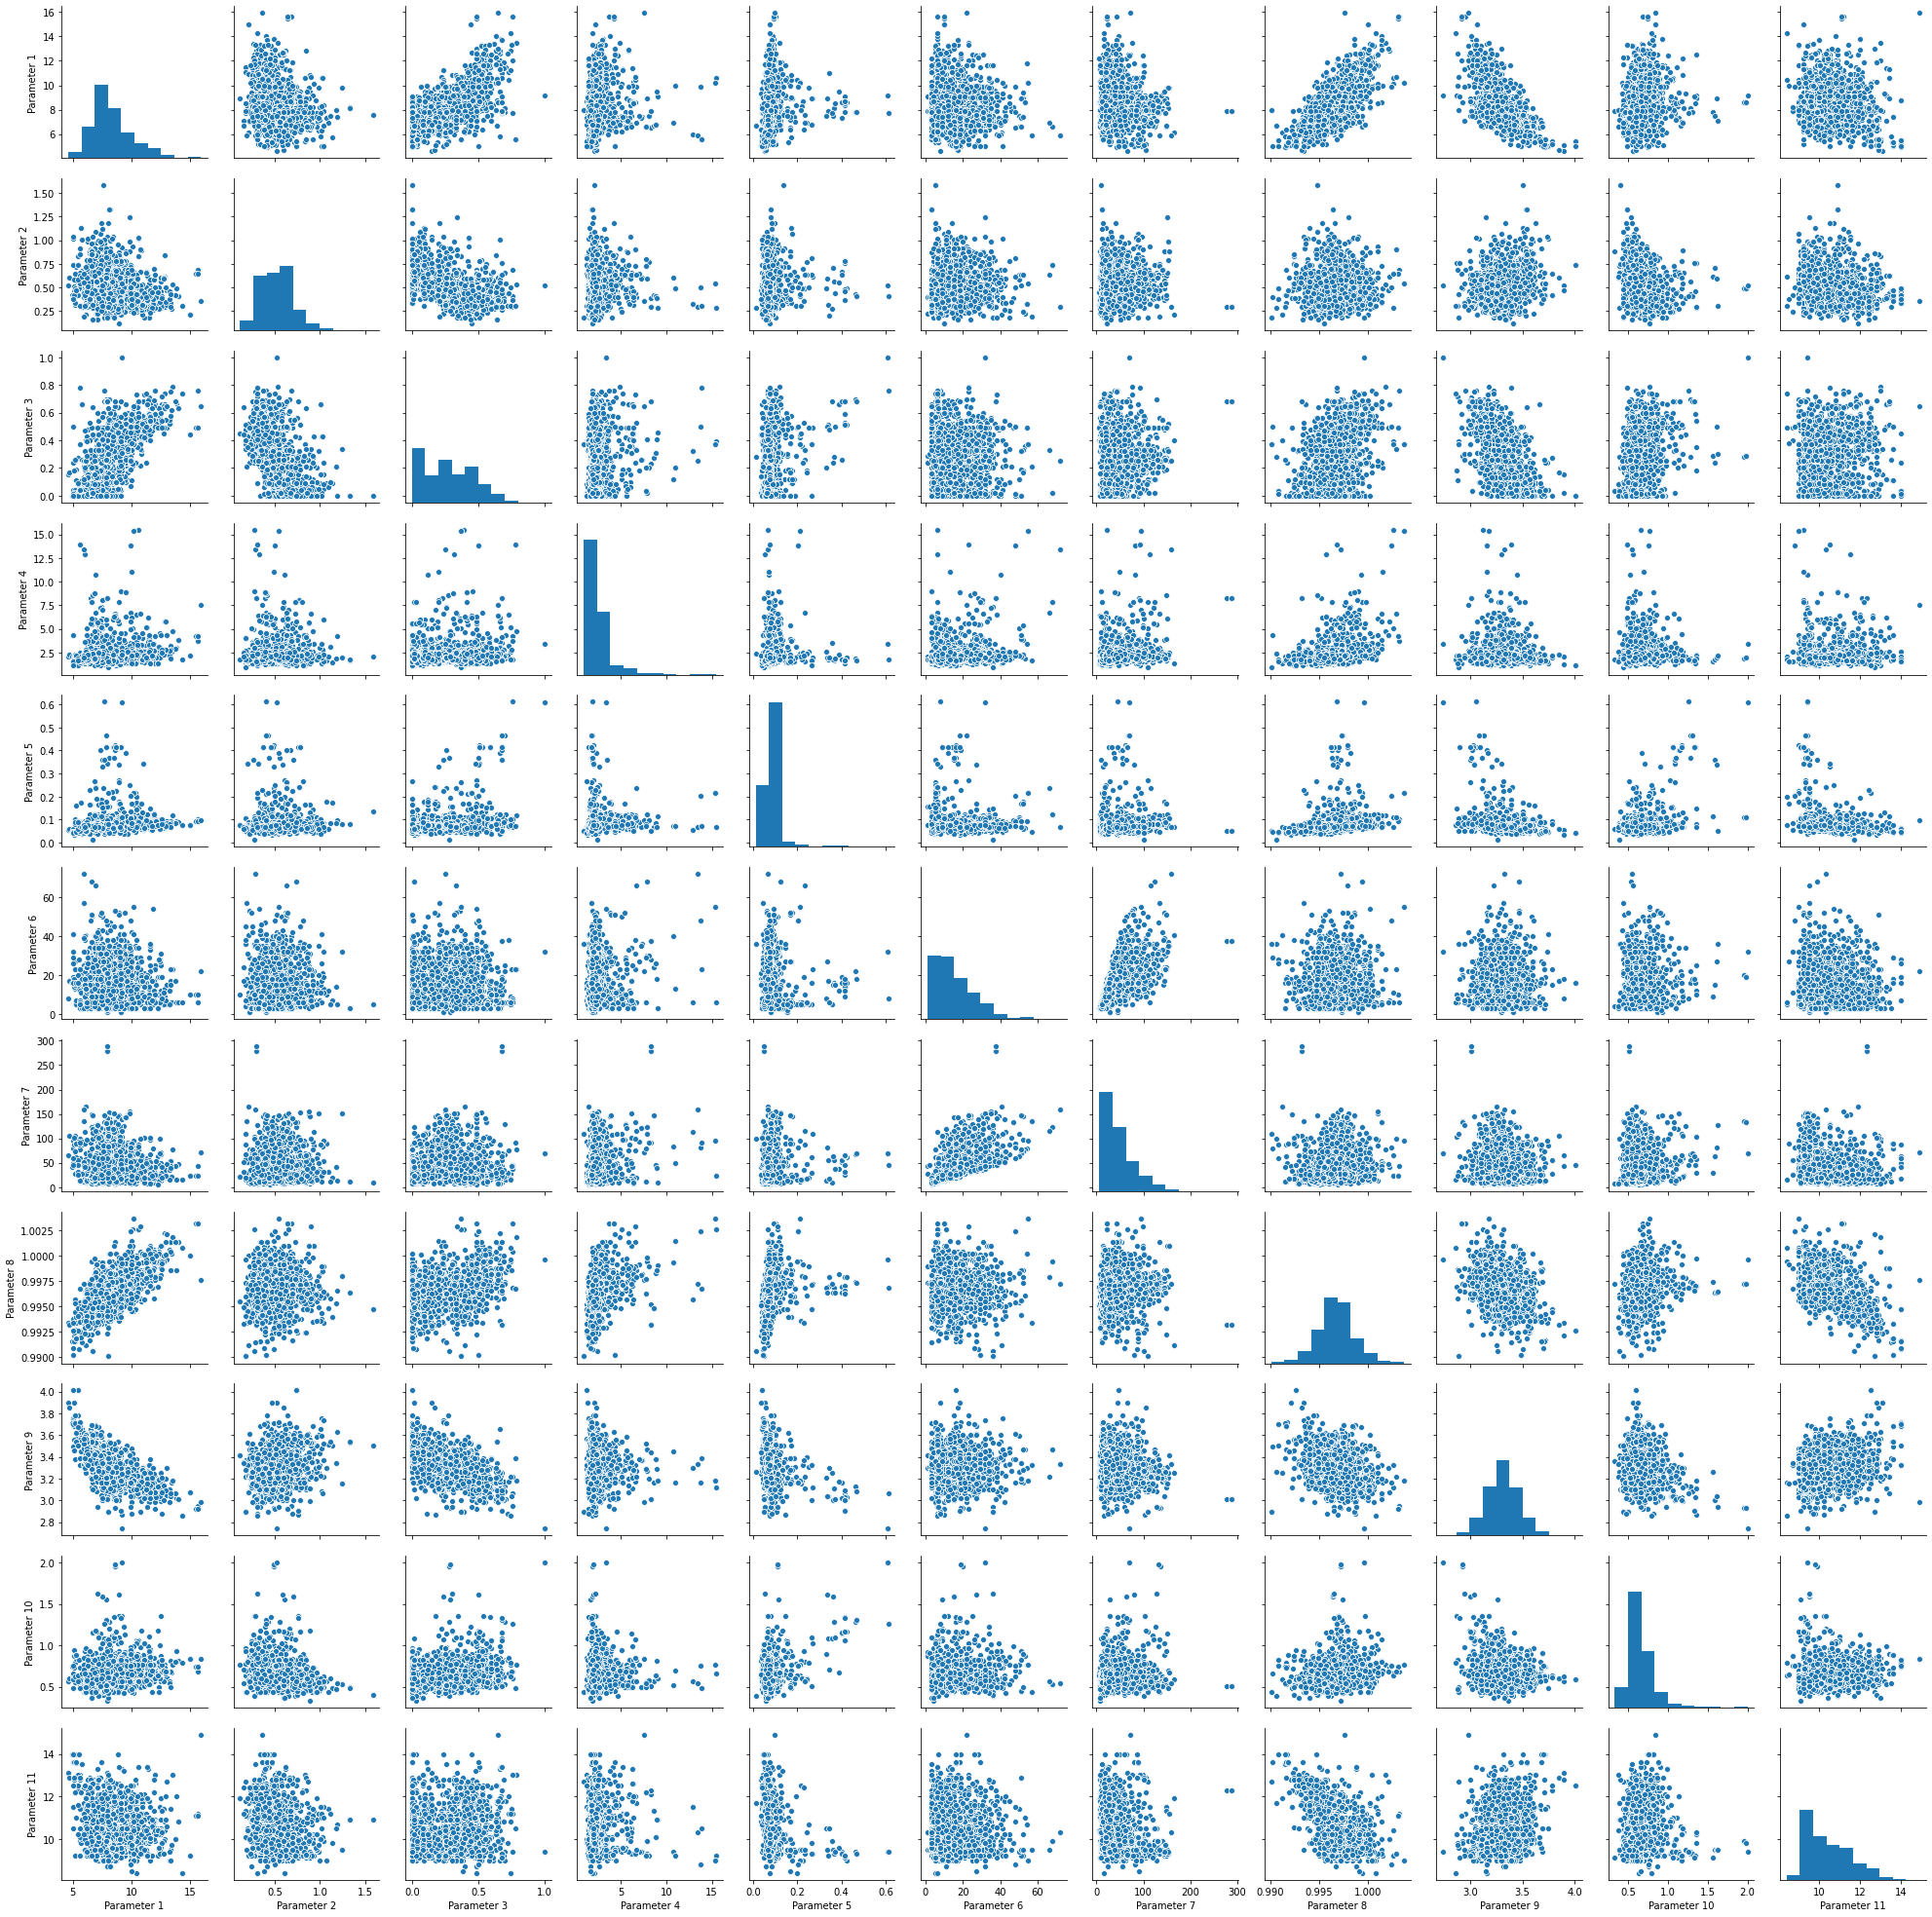

In [13]:
sns.pairplot(idf,diag_kind='hist')
plt.show()

# Model Training (Regression)

In [14]:
# train test split
from sklearn.model_selection import train_test_split
X = idf
y = df['Signal_Strength']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state=29)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [16]:
X_train.shape

(1199, 11)

### Layers Used - 
- Input layer with ReLU activation function and 64 neurons, weights are initialized using He normal initializer
- Then a dense layer with same as before but now with dropout of 0.15
- A dense layer with 128 neurons and other features tuned as of before
- Another dense layer with 64 neurons likely to second layer
- Output layer with activation function as linear and 1 neuron

In [17]:
n = X_train.shape[1]
model = Sequential()
model.add(Dense(64,activation='relu' , kernel_initializer='he_normal' , input_shape=(n,)))
model.add(Dense(64,activation='relu' , kernel_initializer='he_normal'))
model.add(Dropout(0.15))
model.add(Dense(128,activation='relu' , kernel_initializer='he_normal'))
model.add(Dropout(0.15))
model.add(Dense(64,activation='relu' , kernel_initializer='he_normal'))
model.add(Dropout(0.15))
model.add(Dense(1,activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                768       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0

In [18]:
def r2_score(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [19]:
model.compile(optimizer='adam',loss='mean_absolute_error',metrics=[r2_score])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
history = model.fit(X_train_sc, y_train, epochs=75, batch_size=32, validation_data=(X_test_sc, y_test), callbacks=[callback] , validation_split = 0.2)

Epoch 1/75
30/30 [==============================] - 1s 23ms/step - loss: 3.5706 - r2_score: -30.3415 - val_loss: 1.7858 - val_r2_score: -7.7552
Epoch 2/75
30/30 [==============================] - 0s 2ms/step - loss: 1.7377 - r2_score: -7.8904 - val_loss: 1.4471 - val_r2_score: -5.1986
Epoch 3/75
30/30 [==============================] - 0s 2ms/step - loss: 1.5258 - r2_score: -5.1750 - val_loss: 1.2989 - val_r2_score: -4.1700
Epoch 4/75
30/30 [==============================] - 0s 2ms/step - loss: 1.5350 - r2_score: -5.5863 - val_loss: 1.2048 - val_r2_score: -3.3487
Epoch 5/75
30/30 [==============================] - 0s 2ms/step - loss: 1.2976 - r2_score: -3.4286 - val_loss: 1.2175 - val_r2_score: -3.1593
Epoch 6/75
30/30 [==============================] - 0s 2ms/step - loss: 1.2338 - r2_score: -3.3148 - val_loss: 1.1411 - val_r2_score: -2.6880
Epoch 7/75
30/30 [==============================] - 0s 2ms/step - loss: 1.0986 - r2_score: -2.2225 - val_loss: 1.2001 - val_r2_score: -2.8786
Epoc

30/30 [==============================] - 0s 2ms/step - loss: 0.5062 - r2_score: 0.2957 - val_loss: 0.5391 - val_r2_score: 0.1576
Epoch 59/75
30/30 [==============================] - 0s 2ms/step - loss: 0.5542 - r2_score: 0.2195 - val_loss: 0.5294 - val_r2_score: 0.1418
Epoch 60/75
30/30 [==============================] - 0s 2ms/step - loss: 0.5276 - r2_score: 0.1511 - val_loss: 0.5398 - val_r2_score: 0.1479
Epoch 61/75
30/30 [==============================] - 0s 2ms/step - loss: 0.5139 - r2_score: 0.2424 - val_loss: 0.5217 - val_r2_score: 0.1707
Epoch 62/75
30/30 [==============================] - 0s 2ms/step - loss: 0.5317 - r2_score: 0.2535 - val_loss: 0.5475 - val_r2_score: 0.1376
Epoch 63/75
30/30 [==============================] - 0s 2ms/step - loss: 0.5029 - r2_score: 0.2622 - val_loss: 0.5226 - val_r2_score: 0.1715
Epoch 64/75
30/30 [==============================] - 0s 2ms/step - loss: 0.5407 - r2_score: 0.1581 - val_loss: 0.5261 - val_r2_score: 0.1622
Epoch 65/75
30/30 [======

In [20]:
loss , score = model.evaluate(X_test_sc , y_test, batch_size= 64)
print('accuracy: %.3f' % score)
print('Loss    : %.3f' % loss)

7/7 [==============================] - 0s 753us/step - loss: 0.5164 - r2_score: 0.3001
accuracy: 0.300
Loss    : 0.516


In [21]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test_sc)
print(r2_score(y_test,y_pred))

0.3384061673233121


### We are getting pretty low R2_score value in this dataset with regression application 

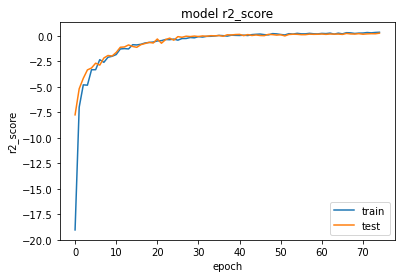

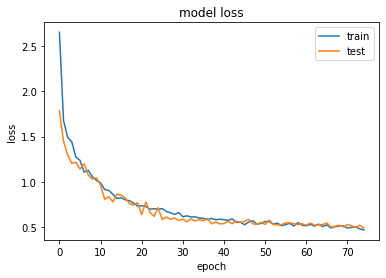

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['r2_score'])
plt.plot(history.history['val_r2_score'])
plt.title('model r2_score')
plt.ylabel('r2_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

## Regression Application Code : 

In [23]:
# Driver code
if __name__ == "__main__":
    # create a GUI window
    gui = Tk()
    # set the background colour of GUI window
    gui.configure(background="light blue")
    # set the title of GUI window
    gui.title("Neural Networks gui-Great Learning")
    # set the configuration of GUI window
    gui.geometry("700x500")
    
##

AlgName = ttk.Label(gui,text="Step 3:Neural Network Regressor ")
AlgName.grid(row=1,column=0,sticky=tk.W)


def Train_Reg():

    accuracy = 'Loss: ' + str(history.history['val_loss'][1])
    accuracy_entrybox = ttk.Entry(gui,width = 16)
    accuracy_entrybox.grid(row=4,column=2)    
    accuracy_entrybox.insert(1,str(accuracy))
    
    accuracy = 'Coeff: ' + str(history.history['val_r2_score'][1])
    accuracy_entrybox = ttk.Entry(gui,width = 16)
    accuracy_entrybox.grid(row=4,column=4)
    accuracy_entrybox.insert(1,str(accuracy))
    
def Run_Reg():
    accuracy = 'Loss: ' + str(loss)
    accuracy_entrybox = ttk.Entry(gui,width = 16)
    accuracy_entrybox.grid(row=6,column=2)        
    accuracy_entrybox.insert(1,str(accuracy))

    accuracy = 'Coeff: ' + str(score)
    accuracy_entrybox = ttk.Entry(gui,width = 16)
    accuracy_entrybox.grid(row=6,column=4)        
    accuracy_entrybox.insert(1,str(accuracy))
    
    cl_label = ttk.Label(gui,text="DONE CLOSE THE WINDOW ")
    cl_label.grid(row=8,column=2,sticky=tk.W)

Train_Reg_Button = ttk.Button(gui,text="Train",command = Train_Reg)
Train_Reg_Button.grid(row=4,column=1)

Run_Reg_Button = ttk.Button(gui,text="Run",command = Run_Reg)
Run_Reg_Button.grid(row=6,column=1)

gui.mainloop()

# Model Training (Classificiation)

In [24]:
y_test = LabelEncoder().fit_transform(y_test)
y_train = LabelEncoder().fit_transform(y_train)

In [25]:
from scipy.stats import zscore
X_train_z = X_train.apply(zscore)
X_test_z = X_test.apply(zscore)

### Layers Used - 
- Input layer with ReLU activation function and 16 neurons, weights are initialized using He normal initializer
- Then a dense layer with 8 neurons
- Output layer with activation function as softmax and 6 output neurons

In [26]:
n = X_train.shape[1]
cl_model = Sequential()
cl_model.add(Dense(16, activation='relu', kernel_initializer='he_normal' , input_shape=(n,)))
cl_model.add(Dense(8, activation='relu' , kernel_initializer='he_normal'))
cl_model.add(Dense(6, activation='softmax'))
cl_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16)                192       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 54        
Total params: 382
Trainable params: 382
Non-trainable params: 0
_________________________________________________________________


In [27]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.05)
cl_model.compile(optimizer=sgd_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = cl_model.fit(X_train_z, y_train, epochs=300, batch_size=128,validation_split = 0.2)

Epoch 1/300
8/8 [==============================] - 0s 27ms/step - loss: 2.0689 - accuracy: 0.2859 - val_loss: 1.6090 - val_accuracy: 0.3917
Epoch 2/300
8/8 [==============================] - 0s 9ms/step - loss: 1.6246 - accuracy: 0.3756 - val_loss: 1.4499 - val_accuracy: 0.4167
Epoch 3/300
8/8 [==============================] - 0s 10ms/step - loss: 1.4687 - accuracy: 0.4228 - val_loss: 1.3630 - val_accuracy: 0.4083
Epoch 4/300
8/8 [==============================] - 0s 26ms/step - loss: 1.3952 - accuracy: 0.4141 - val_loss: 1.3167 - val_accuracy: 0.4333
Epoch 5/300
8/8 [==============================] - 0s 6ms/step - loss: 1.3365 - accuracy: 0.4438 - val_loss: 1.2819 - val_accuracy: 0.4458
Epoch 6/300
8/8 [==============================] - 0s 6ms/step - loss: 1.3000 - accuracy: 0.4474 - val_loss: 1.2642 - val_accuracy: 0.4500
Epoch 7/300
8/8 [==============================] - 0s 7ms/step - loss: 1.2722 - accuracy: 0.4536 - val_loss: 1.2455 - val_accuracy: 0.4542
Epoch 8/300
8/8 [=======

8/8 [==============================] - 0s 5ms/step - loss: 0.9753 - accuracy: 0.5947 - val_loss: 1.0491 - val_accuracy: 0.5708
Epoch 60/300
8/8 [==============================] - 0s 5ms/step - loss: 0.9488 - accuracy: 0.5965 - val_loss: 1.0483 - val_accuracy: 0.5708
Epoch 61/300
8/8 [==============================] - 0s 5ms/step - loss: 0.9395 - accuracy: 0.6048 - val_loss: 1.0469 - val_accuracy: 0.5750
Epoch 62/300
8/8 [==============================] - 0s 5ms/step - loss: 0.9633 - accuracy: 0.5869 - val_loss: 1.0447 - val_accuracy: 0.5792
Epoch 63/300
8/8 [==============================] - 0s 5ms/step - loss: 0.9479 - accuracy: 0.5949 - val_loss: 1.0457 - val_accuracy: 0.5750
Epoch 64/300
8/8 [==============================] - 0s 5ms/step - loss: 0.9467 - accuracy: 0.6037 - val_loss: 1.0428 - val_accuracy: 0.5708
Epoch 65/300
8/8 [==============================] - 0s 5ms/step - loss: 0.9533 - accuracy: 0.6093 - val_loss: 1.0455 - val_accuracy: 0.5792
Epoch 66/300
8/8 [===============

8/8 [==============================] - 0s 5ms/step - loss: 0.9041 - accuracy: 0.6098 - val_loss: 1.0255 - val_accuracy: 0.6000
Epoch 118/300
8/8 [==============================] - 0s 5ms/step - loss: 0.9071 - accuracy: 0.6252 - val_loss: 1.0254 - val_accuracy: 0.6042
Epoch 119/300
8/8 [==============================] - 0s 6ms/step - loss: 0.9506 - accuracy: 0.5978 - val_loss: 1.0256 - val_accuracy: 0.6042
Epoch 120/300
8/8 [==============================] - 0s 5ms/step - loss: 0.9145 - accuracy: 0.6189 - val_loss: 1.0241 - val_accuracy: 0.6000
Epoch 121/300
8/8 [==============================] - 0s 5ms/step - loss: 0.8966 - accuracy: 0.6224 - val_loss: 1.0258 - val_accuracy: 0.6042
Epoch 122/300
8/8 [==============================] - 0s 5ms/step - loss: 0.8831 - accuracy: 0.6300 - val_loss: 1.0273 - val_accuracy: 0.6000
Epoch 123/300
8/8 [==============================] - 0s 6ms/step - loss: 0.8852 - accuracy: 0.6370 - val_loss: 1.0274 - val_accuracy: 0.6167
Epoch 124/300
8/8 [========

8/8 [==============================] - 0s 5ms/step - loss: 0.8461 - accuracy: 0.6426 - val_loss: 1.0090 - val_accuracy: 0.5875
Epoch 176/300
8/8 [==============================] - 0s 5ms/step - loss: 0.8715 - accuracy: 0.6229 - val_loss: 1.0073 - val_accuracy: 0.6125
Epoch 177/300
8/8 [==============================] - 0s 5ms/step - loss: 0.8617 - accuracy: 0.6551 - val_loss: 1.0083 - val_accuracy: 0.6042
Epoch 178/300
8/8 [==============================] - 0s 5ms/step - loss: 0.8436 - accuracy: 0.6463 - val_loss: 1.0089 - val_accuracy: 0.6042
Epoch 179/300
8/8 [==============================] - 0s 5ms/step - loss: 0.8740 - accuracy: 0.6407 - val_loss: 1.0065 - val_accuracy: 0.6083
Epoch 180/300
8/8 [==============================] - 0s 5ms/step - loss: 0.8604 - accuracy: 0.6514 - val_loss: 1.0089 - val_accuracy: 0.6042
Epoch 181/300
8/8 [==============================] - 0s 5ms/step - loss: 0.8839 - accuracy: 0.6343 - val_loss: 1.0070 - val_accuracy: 0.5958
Epoch 182/300
8/8 [========

8/8 [==============================] - 0s 5ms/step - loss: 0.8683 - accuracy: 0.6386 - val_loss: 1.0017 - val_accuracy: 0.6000
Epoch 234/300
8/8 [==============================] - 0s 5ms/step - loss: 0.8264 - accuracy: 0.6632 - val_loss: 0.9972 - val_accuracy: 0.6000
Epoch 235/300
8/8 [==============================] - 0s 5ms/step - loss: 0.8267 - accuracy: 0.6493 - val_loss: 1.0016 - val_accuracy: 0.5958
Epoch 236/300
8/8 [==============================] - 0s 5ms/step - loss: 0.8130 - accuracy: 0.6687 - val_loss: 0.9966 - val_accuracy: 0.5917
Epoch 237/300
8/8 [==============================] - 0s 5ms/step - loss: 0.8441 - accuracy: 0.6523 - val_loss: 1.0003 - val_accuracy: 0.6125
Epoch 238/300
8/8 [==============================] - 0s 5ms/step - loss: 0.8496 - accuracy: 0.6467 - val_loss: 0.9976 - val_accuracy: 0.6042
Epoch 239/300
8/8 [==============================] - 0s 5ms/step - loss: 0.8577 - accuracy: 0.6377 - val_loss: 0.9994 - val_accuracy: 0.6000
Epoch 240/300
8/8 [========

8/8 [==============================] - 0s 17ms/step - loss: 0.8064 - accuracy: 0.6701 - val_loss: 0.9939 - val_accuracy: 0.5917
Epoch 292/300
8/8 [==============================] - 0s 6ms/step - loss: 0.8304 - accuracy: 0.6656 - val_loss: 0.9924 - val_accuracy: 0.5917
Epoch 293/300
8/8 [==============================] - 0s 5ms/step - loss: 0.8176 - accuracy: 0.6800 - val_loss: 1.0011 - val_accuracy: 0.5917
Epoch 294/300
8/8 [==============================] - 0s 5ms/step - loss: 0.8031 - accuracy: 0.6772 - val_loss: 0.9985 - val_accuracy: 0.5875
Epoch 295/300
8/8 [==============================] - 0s 5ms/step - loss: 0.7845 - accuracy: 0.6748 - val_loss: 0.9952 - val_accuracy: 0.5917
Epoch 296/300
8/8 [==============================] - 0s 5ms/step - loss: 0.8106 - accuracy: 0.6695 - val_loss: 0.9916 - val_accuracy: 0.5958
Epoch 297/300
8/8 [==============================] - 0s 5ms/step - loss: 0.7977 - accuracy: 0.6840 - val_loss: 0.9925 - val_accuracy: 0.5958
Epoch 298/300
8/8 [=======

In [28]:
# evaluate the model
loss_cl, acc_cl = cl_model.evaluate(X_test_z, y_test , verbose = 0)
print(' Accuracy: %.3f' % acc_cl)
print(' Loss: %.3f' % loss_cl)

 Accuracy: 0.577
 Loss: 1.022


### We got accuracy above 60% on our dataset using classification model.

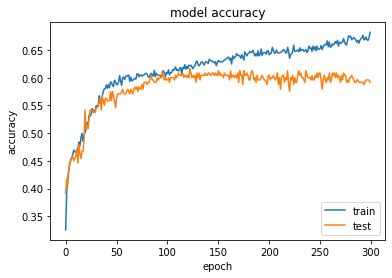

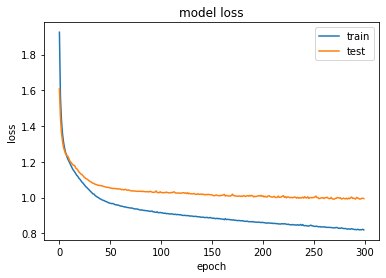

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

## Classification Application Code

In [30]:
# Driver code
if __name__ == "__main__":
    # create a GUI window
    gui = Tk()
    # set the background colour of GUI window
    gui.configure(background="light blue")
    # set the title of GUI window
    gui.title("Neural Networks gui-Great Learning")
    # set the configuration of GUI window
    gui.geometry("700x500")
    
##

AlgoName = ttk.Label(gui,text="Step 4:Neural Network Classifier ")
AlgoName.grid(row=1,column=0,sticky=tk.W)



def Train_cl():

    accuracy = 'Loss: ' + str(history.history['loss'][1])
    accuracy_entrybox = ttk.Entry(gui,width = 16)
    accuracy_entrybox.grid(row=4,column=2)    
    accuracy_entrybox.insert(1,str(accuracy))
    
    accuracy = 'Coeff: ' + str(history.history['accuracy'][1])
    accuracy_entrybox = ttk.Entry(gui,width = 16)
    accuracy_entrybox.grid(row=4,column=4)
    accuracy_entrybox.insert(1,str(accuracy))
    
def Run_cl():
    accuracy = 'Loss: ' + str(loss_cl)
    accuracy_entrybox = ttk.Entry(gui,width = 16)
    accuracy_entrybox.grid(row=6,column=2)        
    accuracy_entrybox.insert(1,str(accuracy))

    accuracy = 'Coeff: ' + str(acc_cl)
    accuracy_entrybox = ttk.Entry(gui,width = 16)
    accuracy_entrybox.grid(row=6,column=4)        
    accuracy_entrybox.insert(1,str(accuracy))
    
    cl_label = ttk.Label(gui,text="DONE CLOSE THE WINDOW ")
    cl_label.grid(row=8,column=2,sticky=tk.W)

Train_cl_Button = ttk.Button(gui,text="Train",command = Train_cl)
Train_cl_Button.grid(row=4,column=1)

Run_cl_Button = ttk.Button(gui,text="Run",command = Run_cl)
Run_cl_Button.grid(row=6,column=1)

gui.mainloop()

#### For the application refrence, is there need to use refactoring for the application to be built ideally. If so please let me know some good resources where we can study refactoring of python code and understand it easily. Thank you in advance.